In [10]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df.shape


(1144, 5)

Linear Regression model

In [44]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :4] #[all_rows : colms until 3rd] #x= df.drop('logS', axis=1)
y = df.iloc[:, 4] #[all rows : only 4th colm]   #y = df['logS']
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state= 40)

print(x.shape)
print(y.shape)


(1144, 4)
(1144,)


In [50]:
print(x_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,) or (n_samples, n_targets)
print(x_test.shape)  
print(y_test.shape)  

(228, 4)
(228,)
(916, 4)
(916,)


In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [61]:
y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test) # we are predicting using y_test values using x_test values

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred_mse = mean_squared_error(y_test, y_test_pred)
y_test_pred_r2_score = r2_score(y_test, y_test_pred)
print(y_test_pred_r2_score, y_test_pred_mse)

0.7589980565338879 1.049874653658433


In [63]:
y_train_pred_mse = mean_squared_error(y_train, y_train_pred)
y_train_pred_r2_score = r2_score(y_train, y_train_pred)
print(y_train_pred_r2_score, y_train_pred_mse)

0.789463009431083 0.9538285422191886


In [68]:
model_results = pd.DataFrame(['Linear Regression', y_train_pred_mse, y_train_pred_r2_score, y_test_pred_mse, y_test_pred_r2_score]).transpose()
model_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
model_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.953829,0.789463,1.049875,0.758998


[]

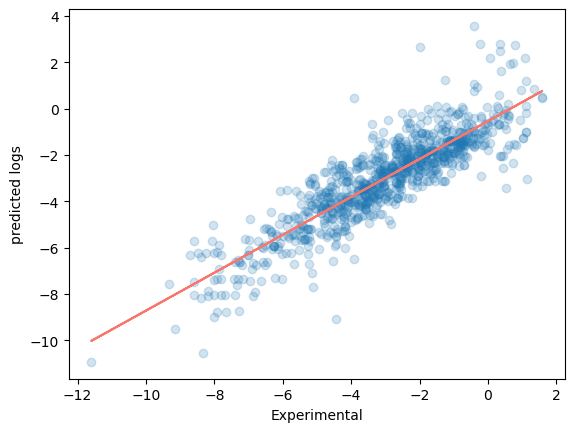

In [79]:
import matplotlib.pyplot as plt
import numpy as np

#to get the trend line
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), "#F8766D") #adding color to trend line
plt.xlabel('Experimental')
plt.ylabel('predicted logs')
plt.scatter(x = y_test, y = y_test_pred, alpha=0.2)
plt.plot()